In [0]:
import numpy as np
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import random
import  scipy.io
from scipy import signal
from scipy import ndimage

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
train_x=np.load("/content/drive/My Drive/task3_data/train_x.npy")
train_y=np.load("/content/drive/My Drive/task3_data/train_y.npy")
test_x=np.load("/content/drive/My Drive/task3_data/test_x.npy")
test_y=np.load("/content/drive/My Drive/task3_data/test_y.npy")
#train_x=train_x.reshape(train_x.shape[0],train_x.shape[1]*train_x.shape[2])
#test_x=test_x.reshape(test_x.shape[0],test_x.shape[1]*test_x.shape[2])
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [4]:
indices=[]
for i in range(0,len(train_x),6000):
    indices.append(random.sample(range(i, i+6000-1),200))
a=[]
b=[]
for index in indices:
    a.append(train_x[index])
    b.append(train_y[index])
X=np.array(a)
Y=np.array(b)
X=np.concatenate((X[0],X[1],X[2],X[3],X[4],X[5],X[6],X[7],X[8],X[9]),axis=0)
Y=np.concatenate((Y[0],Y[1],Y[2],Y[3],Y[4],Y[5],Y[6],Y[7],Y[8],Y[9]),axis=0)
print(X.shape)
print(Y.shape)

(2000, 28, 28)
(2000,)


In [0]:
def load_filters(path):
    data = scipy.io.loadmat(path+'\\filters.mat')
    filters = data['filters']
    filters = np.array(filters)
    return filters
def plot_filters(filters):
    fig, axes = plt.subplots(6, 6, figsize=(15,5))
    itr = 0
    for i in range(6):
        for j in range(6):
            axes[i, j].imshow(filters[:, :,itr])
            axes[i, j].set_xticks([])
            axes[i, j].set_yticks([])
            itr += 1
def size_for_convolution(image_dim,kernal_dim,padding,stride):
    height = int((image_dim[0]-kernal_dim[0]+2*padding)/stride)+1
    width = int((image_dim[1]-kernal_dim[1]+2*padding)/stride)+1
    return height,width
def conv_single_step(img_patch, filtr):
    conv=np.multiply(img_patch,filtr)
    return np.sum(conv)

In [0]:
def conv_forward(sample, filters, stride=1, pad=0):
    height, width=size_for_convolution(sample.shape,filters.shape,pad,stride)
    result=np.zeros((height,width,filters.shape[2]))
    for f in range(0,filters.shape[2]):
        filtr=filters[:,:,f]
        i=j=0
        filter_width=filter_height=filters.shape[0]
        while i<height:
            j=0
            while j<width:
                patch=sample[i:i+filter_height,j:j+filter_width]
                output=conv_single_step(patch,filtr)
                result[i,j,f]=output
                j=j+stride
            i=i+stride
            
    return result

In [0]:
def pool_forward(sample,feature_map, mode = "max", filter_size=2, stride=2):
    indicies=[]
    height, width=size_for_convolution(sample.shape,filters.shape,0,stride)  ##call this function to compute the dimensions
    result=np.zeros((height,width,filters.shape[2]))                  ## of new image
    for f in range(0,feature_map.shape[2]):   ###loop to control convolved image
        i=0
        a=0
        filter_width=filter_height=filter_size   ###initialize width,height, and size
        while (i+filter_height)<=feature_map.shape[0]:
            j=0
            b=0
            while (j+filter_width)<=feature_map.shape[1]:
                #result[a,b,f]=feature_map[i:i+filter_height,j:j+filter_width,f].max()##Computing the max value
                indicies.append(feature_map[i:i+filter_height,j:j+filter_width,f])
                j=j+stride
                b+=1
            i=i+stride
            a+=1
    return np.array(indicies)

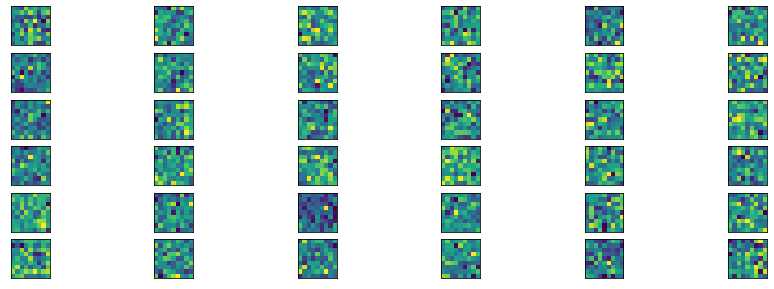

In [8]:
#filters= load_filters("D:\\MS\\Spring 2020\\Deep Learning\\Assignment 03\\")
#print(filters.shape)
filters=np.random.randn(9,9,36)
#print(new_fil.shape)
#filters=new_fil
plot_filters(filters)

In [0]:
def init_network(no_of_layers, input_dim,neurons_per_layer):
    layers_params={}

    for i in range(0,len(neurons_per_layer)):
        if i==0:
            layers_params["W1"]=np.random.randn(input_dim,neurons_per_layer[0]) 
            print("W1 Shape",layers_params["W1"].shape)
            layers_params["B1"]=np.random.randn(neurons_per_layer[0],1)
            #layers_params["B1"]=np.expand_dims(layers_params["B1"],axis=-1)
            print("B1 Shape",layers_params["B1"].shape)
            layers_params["Z1"]=np.zeros((neurons_per_layer[0],1))
            #layers_params["Z1"]=np.expand_dims(layers_params["Z1"],axis=-1)
            print("Z1 Shape",layers_params["Z1"].shape)
            layers_params["A1"]=np.zeros((neurons_per_layer[0],1))
            #layers_params["A1"]=np.expand_dims(layers_params["A1"],axis=-1)
            print("A1 Shape",layers_params["A1"].shape)
        else:
            layers_params[f"W{(i+1)}"]=np.random.randn(neurons_per_layer[i-1],neurons_per_layer[i])
            print("W"+str(i+1)+" Shape",layers_params[f"W{(i+1)}"].shape)
            layers_params[f"B{(i+1)}"]=np.random.randn(neurons_per_layer[i],1)
            #layers_params[f"B{(i+1)}"]=np.expand_dims(layers_params[f"B{(i+1)}"],axis=-1)
            print("B"+str(i+1)+" Shape",layers_params[f"B{(i+1)}"].shape)
            layers_params[f"Z{(i+1)}"]=np.zeros((neurons_per_layer[i],1))
            #layers_params[f"Z{(i+1)}"]=np.expand_dims(layers_params[f"Z{(i+1)}"],axis=-1)
            print("Z"+str(i+1)+" Shape",layers_params[f"Z{(i+1)}"].shape)
            layers_params[f"A{(i+1)}"]=np.zeros((neurons_per_layer[i],1))
            #layers_params[f"A{(i+1)}"]=np.expand_dims(layers_params[f"A{(i+1)}"],axis=-1)
            print("A"+str(i+1)+" Shape",layers_params[f"A{(i+1)}"].shape)
    return layers_params

In [0]:
def sigmoid(s):
    return 1/(1+np.exp(-s))
def sigmoid_derivative(s):
    return s*(1-s)
def MeanImageSubtraction(all_data):
    m_data=np.mean(all_data,axis=0)
    m_data=np.expand_dims(m_data,axis=-1)
    return m_data
def softmax(s):
    s=np.exp(s)
    sum_s=np.sum(s)
    #sum_s=np.expand_dims(sum_s,axis=1)
    return s/sum_s 
def one_hot_encoding(data):
    Y=[]
    for i in range(0,len(data)):
        temp=np.zeros(10,dtype=int)
        if data[i]==0:
            temp[0]=1
            Y.append(temp)
        if data[i]==1:
            temp[1]=1
            Y.append(temp)
        if data[i]==2:
            temp[2]=1
            Y.append(temp)
        if data[i]==3:
            temp[3]=1
            Y.append(temp)
        if data[i]==4:
            temp[4]=1
            Y.append(temp)
        if data[i]==5:
            temp[5]=1
            Y.append(temp)
        if data[i]==6:
            temp[6]=1
            Y.append(temp)
        if data[i]==7:
            temp[7]=1
            Y.append(temp)
        if data[i]==8:
            temp[8]=1
            Y.append(temp)
        if data[i]==9:
            temp[9]=1
            Y.append(temp)
        #print(temp)
    return np.array(Y)

def crossentropyloss(y_pred,Y):
    cel=0;
    for i in range(0,len(Y)):
        cel+= Y[i]*np.log(y_pred[i])
    return -cel

In [0]:
def feedforward(net,trainX, no_of_layers):
    net["Z1"]=np.dot(net["W1"].T,trainX) + net["B1"]
    net["A1"]=sigmoid(net["Z1"])
    for i in  range(1,no_of_layers+1):
        net[f"Z{(i+1)}"]=np.dot(net[f"W{(i+1)}"].T,net[f"A{(i)}"]) +net[f"B{(i+1)}"]
        if i<no_of_layers:
            net[f"A{(i+1)}"]=sigmoid(net[f"Z{(i+1)}"])
            continue
        net[f"A{(i+1)}"]=softmax(net[f"Z{(i+1)}"])
    return net[f"A{(i+1)}"]

In [0]:
def Backwardpropagate(sample, y_pred,Y,net,lr):
    dL_params={}
    ###for last layer 
    Y=np.expand_dims(Y,axis=-1)
    error=y_pred-Y ##error
    dL_params[f"dW{(no_of_layers+1)}"]=np.dot(net["A"+str(no_of_layers)],error.T)
    dL_params[f"dB{(no_of_layers+1)}"]=np.sum(dL_params[f"dW{(no_of_layers+1)}"].T,axis=1,keepdims=True)
    ###for intermdeiate layer
    dZ = np.multiply(sigmoid_derivative(net["A2"]),np.dot(net["W3"],error))
    dL_params[f"dW{(no_of_layers)}"]=np.dot(net["A1"],dZ.T)
    dL_params[f"dB{(no_of_layers)}"]=np.sum(dL_params[f"dW{(no_of_layers)}"].T,axis=1,keepdims=True)
    ###for first layer
    dZ1=np.multiply(sigmoid_derivative(net["A1"]),np.dot(net["W2"],dZ))
    delta=np.dot(net["W1"],dZ1)
    dL_params[f"dW{(no_of_layers-1)}"]=np.dot(sample,dZ1.T)
    dL_params[f"dB{(no_of_layers-1)}"]=np.sum(dL_params[f"dW{(no_of_layers-1)}"].T,axis=1,keepdims=True)
    '''
    net['W'+str(no_of_layers+1)] -= lr*dL_params[f"dW{(no_of_layers+1)}"] ###weights updation
    net['B'+str(no_of_layers+1)] -= lr*dL_params[f"dB{(no_of_layers+1)}"]###bias updation
    net['W'+str(no_of_layers)] -= lr*dL_params[f"dW{(no_of_layers)}"] ###weights updation
    net['B'+str(no_of_layers)] -= lr*dL_params[f"dB{(no_of_layers)}"]###bias updation
    net['W'+str(no_of_layers-1)] -= lr*dL_params[f"dW{(no_of_layers-1)}"] ###weights updation
    net['B'+str(no_of_layers-1)] -= lr*dL_params[f"dB{(no_of_layers-1)}"]###bias updation
    '''
    return dL_params[f"dW{(no_of_layers+1)}"],dL_params[f"dB{(no_of_layers+1)}"],dL_params[f"dW{(no_of_layers)}"],dL_params[f"dB{(no_of_layers)}"],dL_params[f"dW{(no_of_layers-1)}"],dL_params[f"dB{(no_of_layers-1)}"],delta

In [0]:
def relu(s):
    return np.maximum(s,0);

def relu_derivative(s):
    s[s<=0] = 0
    s[s>0] = 1
    return s

In [0]:
def Maxpool(conv_result):
    maxID=np.zeros((conv_result.shape[0],conv_result.shape[1],conv_result.shape[2]))
    stride = 2
    fs = 2
    a=conv_result
    conv_mats = np.array([ [ [ [np.max(a[j:j+fs,k:k+fs,i]),([j,k]+np.array(np.unravel_index(np.argmax(a[j:j+fs,k:k+fs,i] , axis=None),a[j:j+fs,k:k+fs,i].shape)))] for k in range(0,a.shape[1]-fs+1,stride)] for j in range(0,a.shape[0]-fs+1,stride)] for i in range(0,a.shape[-1])])
    #conv_mats=conv_mats.reshape(conv_mats.shape[0]*conv_mats.shape[1]*conv_mats.shape[2],2)
    return conv_mats
                        

In [0]:
def Update_params(W3,B3,W2,B2,W1,B1):
    net['W3'] -= lr*W3 ###weights updation
    net['B3'] -= lr*B3###bias updation
    net['W2'] -= lr*W2 ###weights updation
    net['B2'] -= lr*B2###bias updation
    net['W1'] -= lr*W1 ###weights updation
    net['B1'] -= lr*B1###bias updation
    return

In [0]:
def convolution(a,b):
    res=[]
    for fill in b:
        X=scipy.signal.convolve2d(a,fill[::-1,::-1],mode='valid')[::1,::1]
        res.append(X)
    res=np.array(res)
    res=res.T
    return res

In [0]:
def accuracy(X,Y):
    count=0;
    for i in range(0,len(X)):
        conv_res=conv_forward(X[i],filters)
        conv_res=relu(conv_res)
        pooled_result=Maxpool(conv_res)
        size=pooled_result.shape[0]*pooled_result.shape[1]*pooled_result.shape[2]
        flatt=pooled_result
        flatt=flatt.reshape(size,2)
        flatten=[]
        for val in flatt:
            flatten.append(val[0])
        flatten=np.array(flatten)
        flatten=np.expand_dims(flatten,axis=-1)
        y_pred_tst=feedforward(net,flatten,no_of_layers)
        if np.argmax(y_pred_tst)==np.argmax(Y[i]):
            count+=1
    print("Accuracy = ",count/len(Y))
    return count/len(Y)


In [0]:
accu_vect=[]
loss_vect=[]
filters1=filters.T
lr=0.001
epochs=20

In [19]:
Y=one_hot_encoding(Y)
conv_res=convolution(X[0],filters.T)
pooled_result=Maxpool(conv_res)
bias=np.random.randn(conv_res.shape[0],conv_res.shape[1],conv_res.shape[2])
no_of_layers=2;
input_dim=pooled_result.shape[0]*pooled_result.shape[1]*pooled_result.shape[2]
neurons_per_layer=[128,64,10]
net=init_network(no_of_layers,input_dim,neurons_per_layer)

W1 Shape (3600, 128)
B1 Shape (128, 1)
Z1 Shape (128, 1)
A1 Shape (128, 1)
W2 Shape (128, 64)
B2 Shape (64, 1)
Z2 Shape (64, 1)
A2 Shape (64, 1)
W3 Shape (64, 10)
B3 Shape (10, 1)
Z3 Shape (10, 1)
A3 Shape (10, 1)


In [0]:
def MeanImageSubtraction(all_data):
    m_data=np.mean(all_data,axis=0)
    m_data=np.expand_dims(m_data,axis=-1)
    return m_data

In [0]:
def Mask(index,conv_res):
    maxID=np.zeros((conv_res.shape[0],conv_res.shape[1],conv_res.shape[2]))
    #print(index.shape)
    i=j=k=0 
    # the range of i must be from 0 to 10.
    # the range of j must be from 0 to 10.
    # the range of k must be from 0 to 35.
    while(k<index.shape[0]):
        m=index[k][i][j][1][0]
        n=index[k][i][j][1][1]
        maxID[m][n][k] = 1
        j += 1
        if(j%index.shape[1]==0):
            j=0
            i+= 1
            if (i%index.shape[2]==0):
                i=0
                k+= 1
    return maxID

In [22]:
X=train_x
mIS=MeanImageSubtraction(X)
X=np.subtract(X,mIS.T)
Y=one_hot_encoding(train_y)
epochs=5
for j in range(0,epochs):
    print("Epoch #",j+1)
    loss=0
    p=np.random.permutation(len(X))
    trX=X[p]
    trY=Y[p]
    for i in range(0,len(trX)):
        q=random.sample(list(p),300)
        #print("Image #",i+1)
        conv_res=conv_forward(trX[i],filters)    #Step 1: Perform convolution
        conv_res=conv_res+bias     ###Step 2: Add bias
        conv_res=relu(conv_res)###Step 3: Perform Relu activation
        pooled_result=Maxpool(conv_res) ### step 4: perform Max pooling
        #print("Index shape",pooled_result.shape)
        maxID=Mask(pooled_result,conv_res)
        #print(maxID.shape)
        size=pooled_result.shape[0]*pooled_result.shape[1]*pooled_result.shape[2]
        flatt=pooled_result
        flatt=flatt.reshape(size,2)
        flatten=[]
        for flat in flatt:
            flatten.append(flat[0])
        flatten=np.expand_dims(np.array(flatten),axis=-1)
        y_pred=feedforward(net,flatten,no_of_layers)  ### Step 7: Send to FC layyers
        loss+=crossentropyloss(y_pred,trY[i]) #step 8: Compute loss
        W3,B3,W2,B2,W1,B1,dL=Backwardpropagate(flatten,y_pred,trY[i],net,lr)#Step 9: Backprop of FC layer(s)
        #print(dL.shape)
        dL=dL.reshape(pooled_result.shape[1],pooled_result.shape[2],pooled_result.shape[0]) #Step 10: Unflatten the flattend
        dL=np.concatenate((dL,dL),axis=1)
        dL=np.concatenate((dL,dL),axis=0)
        dL_max_pool=np.multiply(dL,maxID)  #Step 12: Backpropagation of Max-pooling layer
        #print(dL.shape)
        dL=np.multiply(dL,relu_derivative(dL_max_pool)) #Step 13: Apply derivative of Activation function
        dL1=np.flipud(dL) #flip vertically
        dL1=np.fliplr(dL1) #flip horizontally
        filrs=conv_forward(trX[i],dL1) #convolv with input to update filters
        Update_params(W3,B3,W2,B2,W1,B1)
        filters   -=lr*filrs
        bias      -=lr*dL
        if(i%1000==0 and i>1):
            q=random.sample(range(0,i),300)
            valX=trX[q]
            valY=trY[q]
            print("After",i,"Images,Loss and Accuracy")
            accu_vect.append(accuracy(valX,valY))
            print("Loss = ",loss/i)
    loss_vect.append(loss)

Epoch # 1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


After 1000 Images,Loss and Accuracy
Accuracy =  0.11
Loss =  [4.94113658]
After 2000 Images,Loss and Accuracy
Accuracy =  0.15
Loss =  [4.10045238]
After 3000 Images,Loss and Accuracy
Accuracy =  0.15666666666666668
Loss =  [3.7152049]
After 4000 Images,Loss and Accuracy
Accuracy =  0.19666666666666666
Loss =  [3.45813793]
After 5000 Images,Loss and Accuracy
Accuracy =  0.22
Loss =  [3.26297627]
After 6000 Images,Loss and Accuracy
Accuracy =  0.3
Loss =  [3.10921823]
After 7000 Images,Loss and Accuracy
Accuracy =  0.22
Loss =  [3.00580737]
After 8000 Images,Loss and Accuracy
Accuracy =  0.24666666666666667
Loss =  [2.89874861]
After 9000 Images,Loss and Accuracy
Accuracy =  0.29
Loss =  [2.81373595]
After 10000 Images,Loss and Accuracy
Accuracy =  0.2866666666666667
Loss =  [2.73448897]
After 11000 Images,Loss and Accuracy
Accuracy =  0.3433333333333333
Loss =  [2.66418257]
After 12000 Images,Loss and Accuracy
Accuracy =  0.31333333333333335
Loss =  [2.60508052]
After 13000 Images,Loss

KeyboardInterrupt: ignored

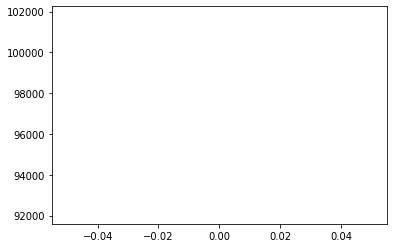

In [23]:
plt.plot(loss_vect)

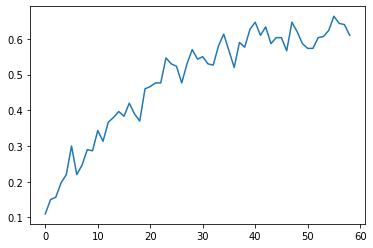

In [24]:
plt.plot(accu_vect)

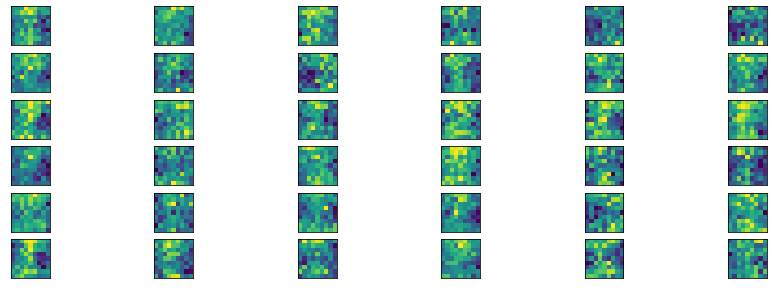

In [25]:
plot_filters(filters)

In [0]:
X=test_x
mIS=MeanImageSubtraction(X)
X=np.subtract(X,mIS.T)
Y=one_hot_encoding(test_y)

In [27]:
accuracy(X,Y)

Accuracy =  0.6334


0.6334